### Importing libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer  #for converting words into tokens
from tensorflow.keras.preprocessing.sequence import pad_sequences # to make sure all sequences in a list have the same lenght
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D 
# to create a dense,input and Globalmaxpooling(which reduce the channel in feature map to a single value , nh x nw x nc will become 1*1*nc)
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
# conv1d for producting outputs,maxpooling -feature map to a single value,and embedding-to convert vectors of fixed size
from tensorflow.keras.models import Model
# model for grouping layers into an object

In [ ]:
file = "/content/drive/MyDrive/Colab Notebooks/Natural learning process/text classification with CNN/spam.csv"
df = pd.read_csv(file, encoding = 'ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.columns= ['labels','data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['output'] = df['labels'].map({'ham':0,'spam':1})
df.drop('labels',axis=1,inplace=True)

In [ ]:
df.head()

,data,output
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
y= df['output'].values
X= df['data'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
max_vocab_size =20000
tokenizer = Tokenizer(num_words = max_vocab_size)
# we will convert words into tokens upto 20000

In [ ]:
tokenizer.fit_on_texts(X_train) # converts text to integer sequence
sequences_train = tokenizer.texts_to_sequences(X_train) # converting to a sequence of integers
sequences_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' %V)

Total number of unique tokens are: 7298


In [ ]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor',data_train.shape)

# we us pad_sequences to make sure that each sequence in a list have the same length

Shape of data train tensor (3900, 162)


In [ ]:
T = data_train.shape[1]

In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor',data_test.shape)

# we want the length to be the same in both train and test_sequence that is why maxlen= 162

Shape of data test tensor (1672, 162)


### Building the model

In [ ]:
# we choose any word vector size that we want
D =20 

# we will create an input layer of shape T
i = Input(shape =(T,))
x = Embedding(V +1, D)(i)
# since the first index starts from 1 we will add V+1

#first CNN layer
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

#2nd CNN layer
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

#3rd CNN layer
x =Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# just like normal clasification in Neural network we will use sigmoid since the output is 0 or 1
x = Dense(1, activation ='sigmoid')(x)

model=Model(i,x)

In [ ]:
model.compile(optimizer ='adam', loss='binary_crossentropy',metrics =['accuracy'])

# binary_crossentropy since we are dealing with a binary problem

In [ ]:
r = model.fit(x= data_train, y=y_train, epochs =5, validation_data = (data_test,y_test))

# here will just use five epochs however we can change it

Epoch 1/5
122/122 [==============================] - 3s 19ms/step - loss: 0.3690 - accuracy: 0.8656 - val_loss: 0.2499 - val_accuracy: 0.8577
Epoch 2/5
122/122 [==============================] - 2s 17ms/step - loss: 0.1015 - accuracy: 0.9638 - val_loss: 0.0897 - val_accuracy: 0.9731
Epoch 3/5
122/122 [==============================] - 2s 18ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0595 - val_accuracy: 0.9880
Epoch 4/5
122/122 [==============================] - 2s 18ms/step - loss: 0.0069 - accuracy: 0.9992 - val_loss: 0.0603 - val_accuracy: 0.9880
Epoch 5/5
122/122 [==============================] - 2s 18ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.0647 - val_accuracy: 0.9874


### Loss and Accuracy

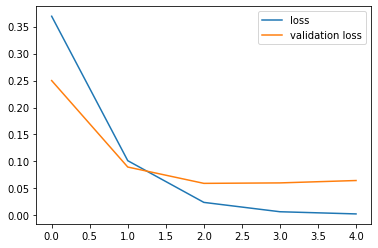

In [ ]:
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

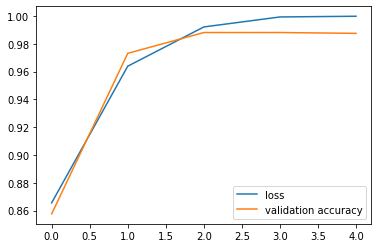

In [ ]:
plt.plot(r.history['accuracy'],label ='loss')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()